In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sentence_transformers import SentenceTransformer
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dimpo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# FIRST TRY WITH FULL ANNOTATIONS

In [57]:
lor=pd.read_excel("for_annotations_relations_lorenzo_try.xlsx")
ric=pd.read_excel("annotations 2000.xlsx")
ric=ric.iloc[0:2000,:]
lor=lor.iloc[0:2170,:]

In [58]:
ric.drop(['Column1'],axis=1,inplace=True)
lor.drop(['Unnamed: 0'],axis=1,inplace=True)

In [59]:
final=pd.concat([lor,ric]).reset_index(drop=True)

In [60]:
final.loc[1693,"is_valuable"]=1

In [61]:
final["is_valuable_rel"]=[1 for i in range(len(final))]
final["is_valuable_arg2"]=[1 for i in range(len(final))]

In [62]:
final.to_excel("final.xlsx")

<AxesSubplot: xlabel='is_valuable', ylabel='Count'>

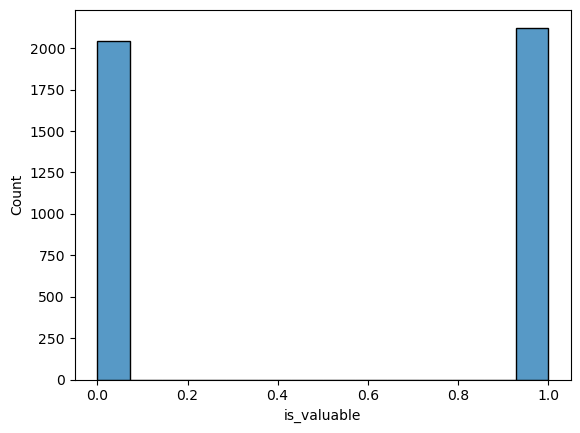

In [50]:
sns.histplot(final["is_valuable"])

In [51]:
final["len_arg1"]=final["arg1"].apply(lambda x: len(word_tokenize(x)))
final["len_rel"]=final["rel"].apply(lambda x: len(word_tokenize(x)))
final["len_arg2"]=final["arg2"].apply(lambda x: len(word_tokenize(x)))

In [38]:

model = SentenceTransformer('all-MiniLM-L6-v2')
final.loc[:, 'arg1'] = final.loc[:, 'arg1'].apply(lambda x: model.encode(x))
final.loc[:, 'rel'] = final.loc[:, 'rel'].apply(lambda x: model.encode(x))
final.loc[:, 'arg2'] = final.loc[:, 'arg2'].apply(lambda x: model.encode(x))

In [39]:
embeddings_arg1 = np.vstack(final.loc[:, 'arg1'].values)
embeddings_rel = np.vstack(final.loc[:, 'rel'].values)
embeddings_arg2 = np.vstack(final.loc[:, 'arg2'].values)

In [40]:
# final.loc[:, 'negated']=final.loc[:, 'negated'].apply(lambda x: 1 if x==True else 0)
# final.loc[:, 'passive']=final.loc[:, 'passive'].apply(lambda x: 1 if x==True else 0)
# negated = np.expand_dims(final.loc[:, 'negated'].values, axis=1)
# passive = np.expand_dims(final.loc[:, 'passive'].values, axis=1)
confidence= final.loc[:, ['confidence']].values
len_arg1 = np.expand_dims(final.loc[:, 'len_arg1'].values, axis=1)
len_rel = np.expand_dims(final.loc[:, 'len_rel'].values, axis=1)
len_arg2 = np.expand_dims(final.loc[:, 'len_arg2'].values, axis=1)


In [41]:
# X = np.hstack([embeddings_arg1, embeddings_rel, embeddings_arg2, negated, passive, confidence])
X = np.hstack([embeddings_arg1, embeddings_rel, embeddings_arg2, confidence, len_arg1, len_rel, len_arg2])

In [54]:
X=final.drop(['is_valuable', 'sentence', 'arg1', 'rel', 'arg2', 'negated', 'passive'],axis=1)

In [42]:
y=final.loc[:, 'is_valuable'].astype(int)

In [56]:


# Create a Random Forest Classifier with desired parameters
rf_classifier = RandomForestClassifier(random_state=42)
score = cross_val_score(rf_classifier, X, y, cv=5,error_score='raise')
score

array([0.56115108, 0.55635492, 0.56354916, 0.52278177, 0.55395683])

In [117]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X,y)

RandomForestClassifier(random_state=42)

In [118]:
from joblib import dump
dump(rf, 'model_file.joblib')

['model_file.joblib']

In [135]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
score = cross_val_score(clf, X, y, cv=5,error_score='raise')
score

# SECOND TRY WITH MORE CLASSIFIERS

In [36]:
mie = pd.read_excel("final.xlsx")
ric = pd.read_csv("150ric.csv")
ele = pd.read_csv("150ele.csv")
domi = pd.read_csv("150domi.csv")
mie.drop(['Unnamed: 0'],axis=1,inplace=True)
ele.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1,inplace=True)

In [37]:
mie=mie.iloc[:605,:]
mie.drop(mie[mie["is_valuable"] == "q"].index, inplace = True)
mie["negated"]=mie["negated"].apply(lambda x: 1 if x==True else 0)
mie["passive"]=mie["passive"].apply(lambda x: 1 if x==True else 0)
ele["negated"]=ele["negated"].apply(lambda x: 1 if x==True else 0)
mie["passive"]=mie["passive"].astype(float)
mie["negated"]=mie["negated"].astype(float)
ele["negated"]=ele["negated"].astype(float)
ele["is_valuable"]=ele["is_valuable"].astype(float)
mie["is_valuable"]=mie["is_valuable"].astype(float)
ele["is_valuable_rel"]=ele["is_valuable_rel"].astype(float)
mie["is_valuable_rel"]=mie["is_valuable_rel"].astype(float)
ele["is_valuable_arg2"]=ele["is_valuable_arg2"].astype(float)
mie["is_valuable_arg2"]=mie["is_valuable_arg2"].astype(float)
ric.rename(columns={"arg1_val": "is_valuable","rel_val":"is_valuable_rel","arg2_val":"is_valuable_arg2"},inplace=True)


In [43]:
final=pd.concat([mie,ric,ele,domi]).reset_index(drop=True)

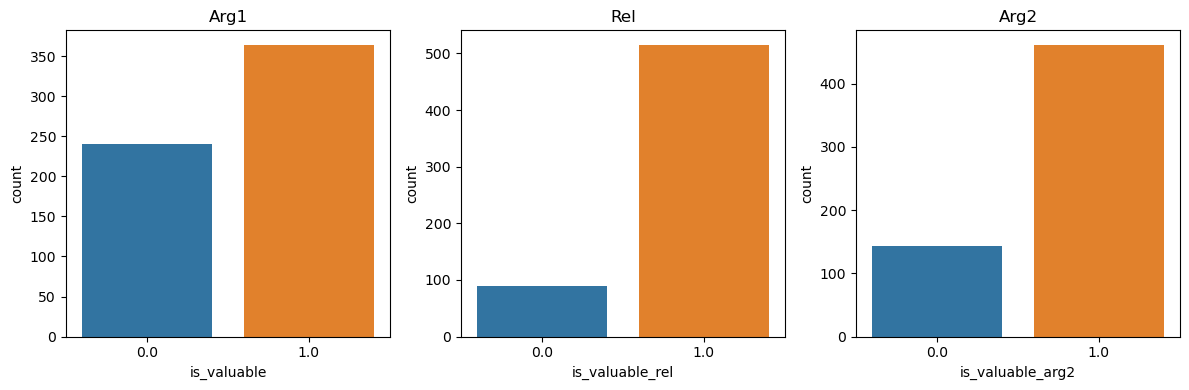

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.countplot(data=final, x='is_valuable', ax=axes[0])
axes[0].set_title('Arg1')
sns.countplot(data=final, x='is_valuable_rel', ax=axes[1])
axes[1].set_title('Rel')
sns.countplot(data=final, x='is_valuable_arg2', ax=axes[2])
axes[2].set_title('Arg2')
plt.tight_layout()
plt.show()


In [ ]:
main_pos_tags = {'Noun': ['NN', 'NNS', 'NNP', 'NNPS'],
                 'Pronoun': ['PRP', 'PRP$'],
                 'Adjective': ['JJ', 'JJR', 'JJS'],
                 'Verb': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']}

def count_main_pos_tags(sentence):
    pos_tags = nltk.pos_tag(nltk.word_tokenize(sentence))
    tag_counts = {tag_group: 0 for tag_group in main_pos_tags}
    for word, tag in pos_tags:
        for tag_group, tags in main_pos_tags.items():
            if tag in tags:
                tag_counts[tag_group] += 1
    return tag_counts

In [81]:
def for_class(df,x):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    if x=="arg1":
        db=df[["arg1","is_valuable"]]
        db["length"]=db["arg1"].apply(lambda x: len(word_tokenize(x)))
        db['main_pos_counts'] = db['arg1'].apply(count_main_pos_tags)
        db = pd.concat([db.drop('main_pos_counts', axis=1), db['main_pos_counts'].apply(pd.Series)], axis=1)
        db.loc[:, 'arg1'] = db.loc[:, 'arg1'].apply(lambda x: model.encode(x))
        embeddings_arg1 = np.vstack(db.loc[:, 'arg1'].values)
        len_arg1 = np.expand_dims(db.loc[:, 'length'].values, axis=1)
        nouns=np.expand_dims(db.loc[:, 'Noun'].values, axis=1)
        pronouns=np.expand_dims(db.loc[:, 'Pronoun'].values, axis=1)
        adjectives=np.expand_dims(db.loc[:, 'Adjective'].values, axis=1)
        verbs=np.expand_dims(db.loc[:, 'Verb'].values, axis=1)
        db= np.hstack([embeddings_arg1, len_arg1, nouns, pronouns, adjectives, verbs])
    elif x=="rel":
        db=df[["rel","is_valuable_rel"]]
        db["length"]=db["rel"].apply(lambda x: len(word_tokenize(x)))
    elif x=="arg2":
        db=df[["arg2","is_valuable_arg2"]]
        db["length"]=db["arg2"].apply(lambda x: len(word_tokenize(x)))
    return db

### Classifier for Arg1

In [82]:
db_arg1=for_class(final,"arg1")
y_arg1=final["is_valuable"]

/var/folders/hx/n0zcsqj95pq2sj7w5hfh23qm0000gn/T/ipykernel_17943/1537226926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["length"]=db["arg1"].apply(lambda x: len(word_tokenize(x)))
/var/folders/hx/n0zcsqj95pq2sj7w5hfh23qm0000gn/T/ipykernel_17943/1537226926.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['main_pos_counts'] = db['arg1'].apply(count_main_pos_tags)


                              arg1  is_valuable  length  Noun  Pronoun   
0  Alabama Governor George Wallace          1.0       4     4        0  \
1       an infamous segregationist          0.0       3     1        0   
2                          Wallace          1.0       1     1        0   
3                  Hunt Commission          1.0       2     2        0   
4                  Hunt Commission          1.0       2     2        0   

   Adjective  Verb  
0          0     0  
1          1     0  
2          0     0  
3          0     0  
4          0     0  


In [85]:
rf_arg1=RandomForestClassifier(random_state=42)
score = cross_val_score(rf_arg1, db_arg1, y_arg1, cv=10,error_score='raise')
print(f"the average accuracy was: {score.mean()} and the complete score was: {score}")

the average accuracy was: 0.8127595628415302 and the complete score was: [0.83606557 0.86885246 0.80327869 0.83606557 0.85       0.8
 0.86666667 0.75       0.75       0.76666667]


In [80]:
ex

,confidence,sentence,arg1,rel,arg2,negated,passive,is_valuable,is_valuable_rel,is_valuable_arg2,Noun,Pronoun,Adjective,Verb
0,9.615261e-01,"Alabama Governor George Wallace, an infamous s...",Alabama Governor George Wallace,did well,in South and among alienated and dissatisfied ...,0.0,0.0,1.0,1.0,1.0,4,0,0,0
1,9.200288e-01,"Alabama Governor George Wallace, an infamous s...",an infamous segregationist,ran,on a third-party ticket in 1968,0.0,0.0,0.0,1.0,0.0,1,0,1,0
2,9.324145e-01,What might have become a forceful campaign was...,Wallace,was shot,in an assassination attempt by Arthur Bremer,0.0,1.0,1.0,1.0,1.0,1,0,0,0
3,9.266232e-01,McGovern had led Hunt Commission to re-design ...,Hunt Commission,to re-design,Democratic nomination system,0.0,0.0,1.0,0.0,1.0,2,0,0,0
4,9.382554e-01,Some of principles of Hunt Commission have las...,Hunt Commission,instituted,selection of Superdelegates,0.0,0.0,1.0,1.0,1.0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,8.872966e+15,"Labor governments have not attempted ""democrat...",1940 s,have privatised,several industries such as banking,0.0,0.0,0.0,1.0,1.0,1,0,0,0
600,9.143457e+15,"Labor governments have not attempted ""democrat...",Chifley government,to nationalise,private banks,0.0,0.0,1.0,0.0,1.0,1,0,1,0
601,9.755173e+15,The Labor Party has always had a left wing and...,The Labor Party,has been organised,into formal factions,0.0,1.0,1.0,1.0,1.0,2,0,0,0
602,7.710171e+15,The two largest factions tend to occupy social...,The two largest factions,to occupy,social - liberal,0.0,1.0,1.0,0.0,0.0,1,0,1,0
